# Выборка распределения (Sampling Distribution)

В статистике, мы часто хотим узнать о больших популяциях. Но даже сбор данных для подобной ситуации является часто невозможным, исследователи могут использовать меньший набор данных для того чтобы попробовать ответить на впоросы к большей ее популяции.

Для того чтобы сделать так, исследователи могут рассчитывать статистику такую как среднее значение или медиану для выборки данных. Далее они могут использовать эту статистику как истинную для значений популяции которая им действительно необходима.

Например, предположим что исследователь хочет знать среднее значение веса атлантической лососевой рыбы. Это невозможно - поймать каждую рыбу, но исследователь может поймать небольшой набор рыб состоящий из 50 в районе Нова Скот и сделать заключение что средний вес пойманых рыб такой. Если тотже исследователь поймает 50 новых рыб и получит новое среднее значение веса, данное среднее значние будет отличаться от предыдущего.

## Составление случайного набора на Python

In [24]:
# Мы сгенерировали некоторый набор случайных данных
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# загрузим данные в переменную
population = pd.read_csv('./files/salmon_population.csv')
population = np.array(population.Salmon_Weight)

# вычислим среднее значение по популяции
pop_mean = round(np.mean(population), 3)

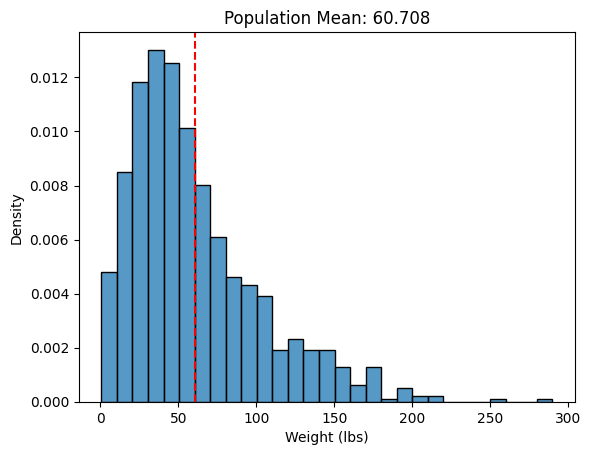

<Figure size 640x480 with 0 Axes>

In [4]:
sns.histplot(population, stat='density')
plt.axvline(pop_mean,color='r',linestyle='dashed')
plt.title(f"Population Mean: {pop_mean}")
plt.xlabel("Weight (lbs)")
plt.show()
plt.clf()

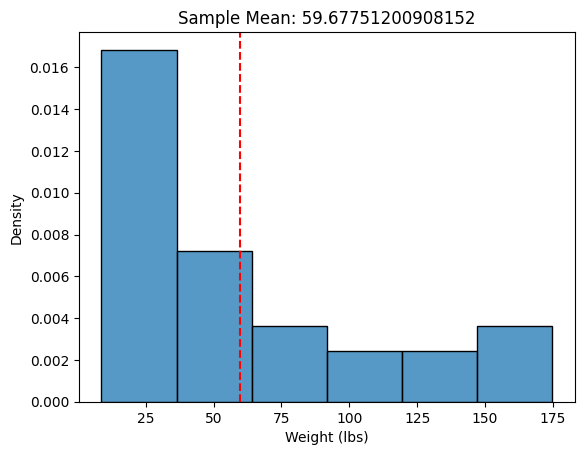

In [12]:
# создадим более малый набор из популяции размером 30

samp_size = 30
sample = np.random.choice(np.array(population), samp_size, replace = False)
sample_mean = np.mean(sample)

# отобразим графически
sns.histplot(sample, stat='density')
plt.axvline(sample_mean,color='r',linestyle='dashed')
plt.title(F"Sample Mean: {sample_mean}")
plt.xlabel("Weight (lbs)")
plt.show()

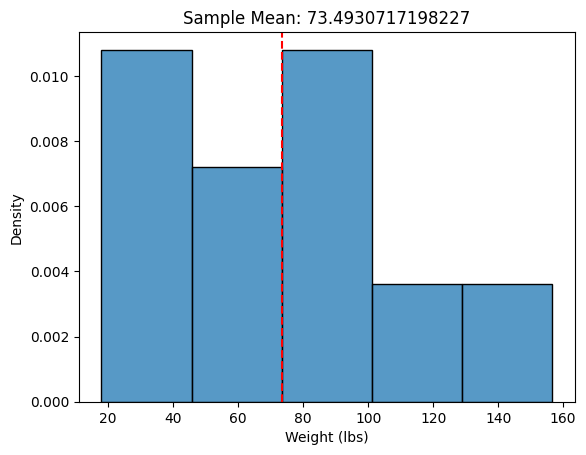

In [14]:
# давайте изменим размер выборки на 10 и посмотрим как измениться график
# создадим более малый набор из популяции размером 30

samp_size = 10
sample = np.random.choice(np.array(population), samp_size, replace = False)
sample_mean = np.mean(sample)

# отобразим графически
sns.histplot(sample, stat='density')
plt.axvline(sample_mean,color='r',linestyle='dashed')
plt.title(F"Sample Mean: {sample_mean}")
plt.xlabel("Weight (lbs)")
plt.show()

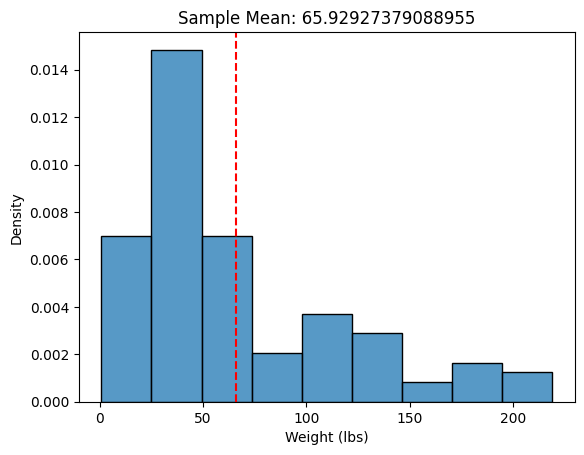

In [20]:
# а теперь увеличим

samp_size = 100
sample = np.random.choice(np.array(population), samp_size, replace = False)
sample_mean = np.mean(sample)

# отобразим графически
sns.histplot(sample, stat='density')
plt.axvline(sample_mean,color='r',linestyle='dashed')
plt.title(F"Sample Mean: {sample_mean}")
plt.xlabel("Weight (lbs)")
plt.show()

Как можно заметить чем меньше кол-во элементов в выборке тем сильнее изменяется значение среднеего, чем больше размер выборки тем точнее среднее значение выборки ближе к серднему показателю популяции

Как видно из примера выше, каждый раз когда мы собираем выборку из популяции, среднее значение данной выборки каждый раз отличается от предыдущего не только в завимости от длинны выборки но и отзначений которые выбираются случайным образом из популяции. Для того чтобы понять как много вариантов мы можем ожидать от среднийх значений выборок, мы можем сделать следующее.
- взять несколько выборок случайных значений из популяции одинакового размера (например по 50 рыб в каждом наборе)
- рассчитать среднее значение каждой выборки
- построить гистограмму средний значений популяции

Данный процесс даст нам оценку распределения средний значений выборок для размера каждой выборки равной 50. 

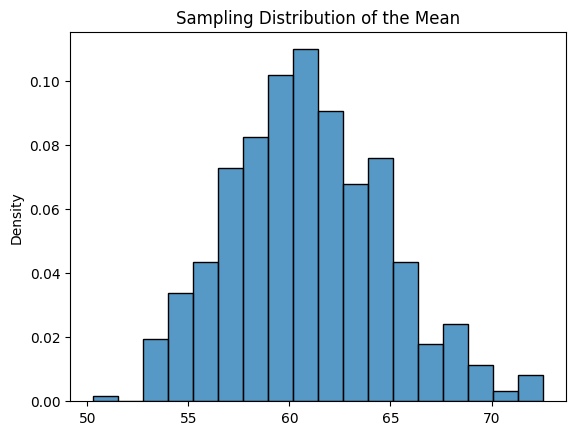

<Figure size 640x480 with 0 Axes>

In [22]:
sample_size = 50
sample_means = []

for i in range(500):
    samp=np.random.choice(population, samp_size, replace=False)
    this_sample_mean = np.mean(samp)
    sample_means.append(this_sample_mean)

sns.histplot(sample_means, stat='density')
plt.title('Sampling Distribution of the Mean')
plt.show()
plt.clf()

## Теорема Центрального Лимита (Central Limit Theorem)

Не так давно мы определили понятие распределение выборок и показали как мы можем смоделировать приблизительное распределение выборки для нескольких различных статистических данных (Mean, maximum, variance etc.). 

Теорема центрального лимита (CLT) позволяет нам специфично описать распределение выборки средних значений.

CLT гласит что распределение выборки средних значений являются нормальным распределением до тех пока вся популяция не будет сильно скошенной в одни или другую сторону или размер выборки не будет достаточно большим. Использование размера выборки более 30 обычно это хорошее правило. Если распределение популяции нормально, то размер выборки может быть меньше чем указанное значение.

Давайте еще раз взглянем на вес лосося чтобы увидеть как CLT может быть применено тут. Первый график ниже показываеть распределение всей популяции. Вес лосося смещено вправо, что значит что хвост распределения расположен справой стороны.

![Population Distribution](./img/4_1.png)

Далее мы смоделировали распределение выборки средний значений (используя размер выборки равной 100). Обратите внимание как полученное выборка распределения следует за кривой нормального распределения.

![Sampling Distribution](./img/4_2.png)

Теперь когда мы рассмотрели CLT на верхнем уровне, давайте углубимся в детали.

CLT не только устанавливает что выборочное распределение будет распределенно нормально, но также позволяет нам кол-нно описать это нормальное распределение. Нормальные распределения описываются их средним значением и стандартным отклонением.

Давайте рассмотрим это ближе:
- мы берем выборку размером *n* из популяции (которая имеет истинное среднее значение популяции и стандартное отклонение) и вычисляем выборочное среднее значение
- Учитывая что значение *n* достаточно велико (более 30), распределение выборки средних значений будет распределенно нормально с
    - средним значеним приблизительно равное среднему значению популяции
    - стандартным отклонение равное стандартному отклонению популяции, деленному на квадратный корень размера выборки.

В качестве примера давайте снова рассмотрим нашу популяцию лососевых рыб. В прошлом упражнении мы увидели, что распределение выборки среднего значения было распределенно нормально. На графике ниже можно заметить что среднее значение смоделированного распределения выборки приблизительно равно среднему значению популяции

![](./img/4_3.png)

![](./img/4_4.png)

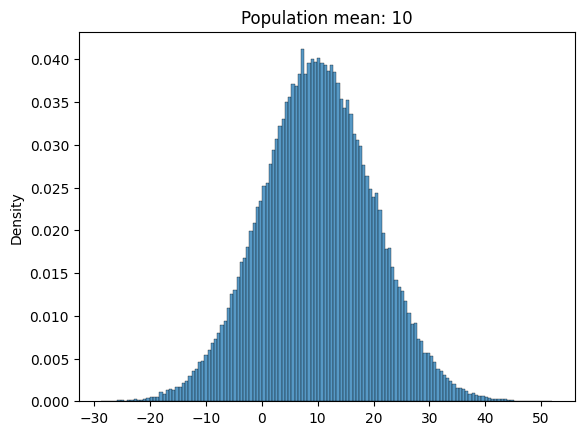

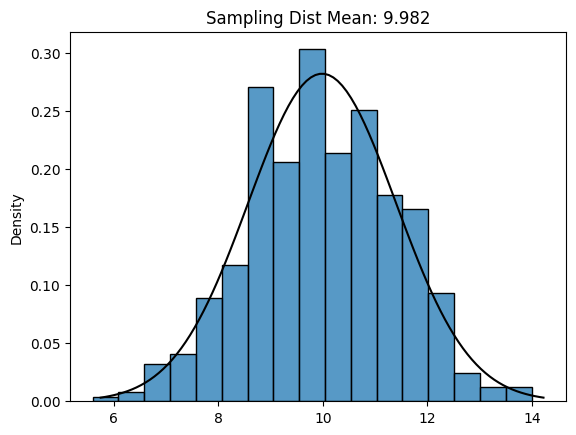

In [27]:
# созададим переменные которые будут параметрами нормального распределения
population_mean = 10
population_std_dev = 10

# укажем размер выборки
samp_size = 50

# смоделируем популяцию используя библиотеку numpy и метод random.normal
# данный метод принимает 3 параметра
# среднее значение, значение стандартного отклонение, и общий размер популяции
population = np.random.normal(population_mean, population_std_dev, size = 100000)

# создаем переменную для сохранения средних значений выборок
sample_means = []

for i in range(500):
    samp = np.random.choice(population, samp_size, replace=False)
    sample_means.append(np.mean(samp))

# вычисляем среднее значение средних значений выборок
mean_sampling_distribution = round(np.mean(sample_means), 3)

# выводим график популяции
sns.histplot(population, stat='density')
plt.title(f'Population mean: {population_mean}')
plt.xlabel('')
plt.show()

# выводим график выборок
sns.histplot(data=sample_means, stat='density')
mu = np.mean(population)
sigma = np.std(population)/(samp_size**.5)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

plt.plot(x, stats.norm.pdf(x, mu, sigma), color='k', label = 'normal PDF')
plt.title(f'Sampling Dist Mean: {mean_sampling_distribution}')
plt.xlabel('')
plt.show()

## Стандартная ошибка (Standart Error)

Вторая часть центрально теоремы лимита заключается в том что:

Распределение выборки среднего значения является нормальным, со стандартным отклонением, равным стандартному отклонению генеральной совокупности (часто обозначемому греческой буквой сигма), деленному на квадратный корень размера выборки (что обозначаемого как *n*)

Стандартное отклонение распределения выборки также известно как стандартная ошибка предела среднего значения. Во многих моментах, мы не можем знать стандартное отклонение популяции, в таком случае мы рассчитываем стандартную ошибку используя стандартное отклонение выборки

Две важные вещи которые необходимо запомнить:
- С увеличением размера выборки, уменьшается стандартная ошибка
- С увеличением стандартного отклонения популяции, увеличивается и стандартная ошибка

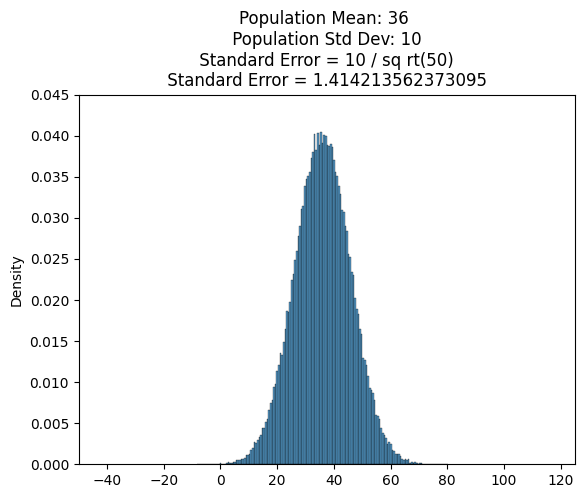

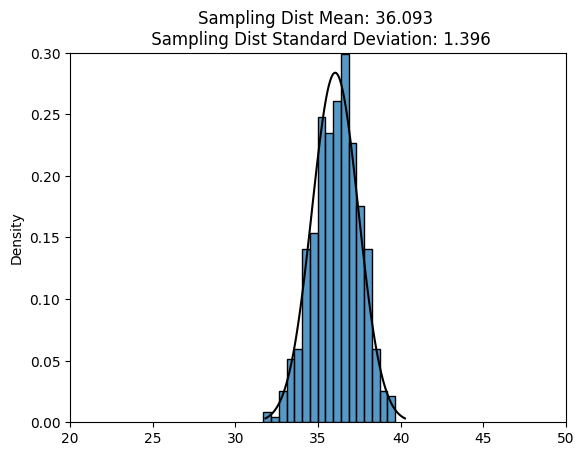

In [29]:
population_mean = 36
population_std_dev = 10

samp_size = 50

population = np.random.normal(population_mean, population_std_dev, size = 100000)

sample_means = []
for i in range(500):
    samp = np.random.choice(population, samp_size, replace = False)
    sample_means.append(np.mean(samp))

mean_sampling_distribution = round(np.mean(sample_means),3)
std_sampling_distribution = round(np.std(sample_means),3)

std_error = population_std_dev / (samp_size **0.5)

sns.histplot(population, stat = 'density')
plt.title(f"Population Mean: {population_mean} \n Population Std Dev: {population_std_dev} \n Standard Error = {population_std_dev} / sq rt({samp_size}) \n Standard Error = {std_error} ")
plt.xlim(-50,125)
plt.ylim(0,0.045)
plt.show()
plt.clf()

sns.histplot(sample_means, stat = 'density')
mu = np.mean(population)
sigma = np.std(population)/(samp_size**.5)

x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), color='k', label = 'normal PDF')
plt.title(f"Sampling Dist Mean: {mean_sampling_distribution} \n Sampling Dist Standard Deviation: {std_sampling_distribution}")
plt.xlim(20,50)
plt.ylim(0,0.3)
plt.show()

## Предвзятость оценки (Biased Estimators)

В рамках теоремы центрального лимита, среднее значение средних значений распределения выборки равна среднему значению популяции. Это касается некоторых но не всех, распределений выборки. Помните, у вас может быть распределение выборки для любой статистики выборки, включая:
- mean
- median
- max|min
- variance

По той причине что среднее значение средних значений распределений выборки равно среднему значению популяции, мы называем ее НЕ предвзятая оценка (Unbiased Estimator). Статистический показатель называется не предвзятой оценкой параметра популяции в том случае если среднее значение статистического показателя распределения выборки равно подобному статистическому значению популяции.

Максимальное значение это один из пример предвзятой оценки, это значит что среднее значение максимальных значений распределений выборки не равно максимальному значению популяции.

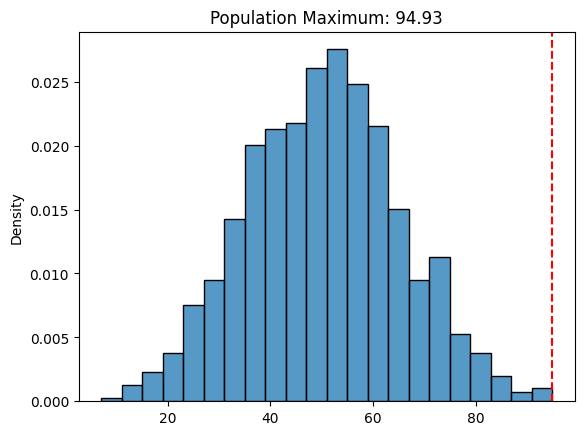

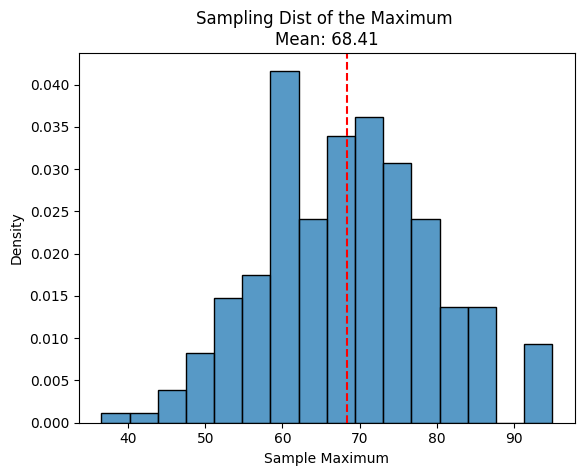

<Figure size 640x480 with 0 Axes>

In [30]:
app_stat_text = "Maximum"
def app_statistic(x):
    return np.max(x)

### Below calculates the statistic for this population:
### You don't need to change anything below to pass the checkpoints
mean, std_dev = 50, 15
population = np.random.normal(mean, std_dev, 1000)

pop_statistic = round(app_statistic(population),2)

sns.histplot(population, stat = 'density')
plt.axvline(pop_statistic,color='r',linestyle='dashed')
plt.title(f"Population {app_stat_text}: {pop_statistic}")
plt.xlabel("")
plt.show()
plt.clf()

sample_stats = []
samp_size = 5
for i in range(500):
    samp = np.random.choice(population, samp_size, replace = False)
    this_sample_stat = app_statistic(samp)
    sample_stats.append(this_sample_stat)

sns.histplot(sample_stats, stat = 'density')
plt.title(f"Sampling Dist of the {app_stat_text} \nMean: {round(np.mean(sample_stats),2)}")
plt.axvline(np.mean(sample_stats),color='r',linestyle='dashed')
plt.xlabel(f"Sample {app_stat_text}")
plt.show()
plt.clf()

## Расчет вероятностей (Calculating Probabilities)

Теперь мы значем что распределение выборки средних значений, мы также можем использовать для вычисления вероятность наблюдения некоторого определенного диапазона выборки средних значений, дающей некотору информацию о популяции. Для того чтобы сделать это, мы можем использовать Функцию кумулятивного распределения (Cumulative Distribution Function или CDF) нормального распределения.

Давайте рассмотрим это на примере лососевых рыб. Давайте предположим что мы перевозим лосось и хотим быть уверены что ящик для перевозки рыбы будет достаточно крепким чтобы выдержать вес рыбы.
- Ранее мы уже рассчитали что популяци лосося имеет средний вес 60 кг со стандартным отклонением 40 кг.
- У нас есть ящик который выдерживает до 750 кг, и мы хотим перевозить по 10 рыб за один раз
- Мы хотим рассчитать вероятность что средний вес этих 10 рыб будет меньше или равно 75 кг.

Используйте CLT (Central Limit Theorem), в первую очередь мы рассчитали что среднее значение веса 10 случайных рыб из популяции нормального распределения со средним значением 60 и стандартной ошибкой 40/10^.5. Далее, мы можем использовать это распределение вероятности для расчета вероятность что случайная выборка из 10 будет иметь общий вес меньше чем 750 кг.

In [31]:
x = 75
mean = 60
std_dev = 40
samp_size = 10
standard_error = std_dev / (samp_size**.5)
# remember that **.5 is raising to the power of one half, or taking the square root

stats.norm.cdf(x,mean,standard_error)

np.float64(0.8821600432854813)

Код выше вернул 0.882 или вероятность 88.2% что средний вес нашей выборки из 10 рыб будет ниже или равно 75 кг.

In [36]:
# давайте рассчитаем такой же показатель вероятности для нашей популяции
# мы знаем что популяция имеет средний вес 36 кг со стандартным отклонением равному 20 кг.
# Мы хотим попробовать пометисть 25 рыб в такойже ящик для перевозки который может выдрежать вес до 750 кг.
# Нашим первым шагом будет расчет стандартной ошибки выборки размером 25. Используя код выше сохраните значение в переменную standart_error
x = 30
mean = 36
std_dev = 20
samp_size = 20
standart_error = std_dev / (samp_size**.5)

cod_cdf = stats.norm.cdf(x,mean,standard_error)
print(cod_cdf)

0.31762814799862416
